In [25]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


N_traj 500


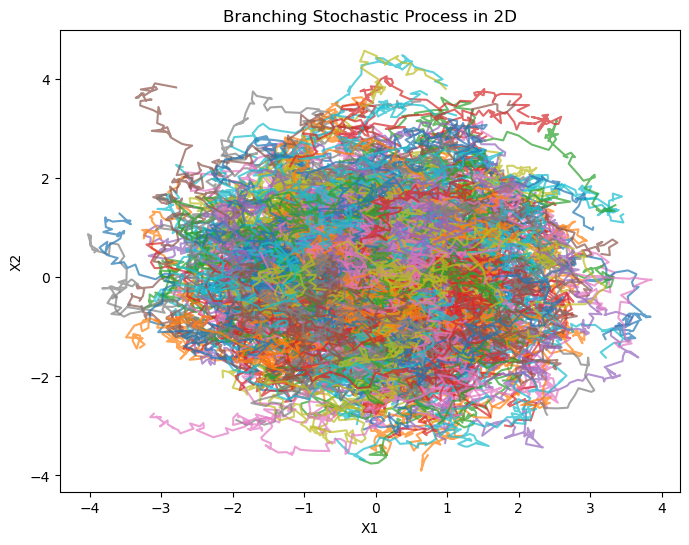

In [26]:
d = 2
A = np.array([[0, 1], 
              [-1, 0]])

G = np.array([[1.0, 0.0], 
              [0.0, 1.0]])

H = G@G.T
lambda_func = lambda X: 0

N_init = 500
X0 = np.random.multivariate_normal([0, 0], np.diag([1, 1]), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
process = BranchingStochasticProcess(A, G, X0, lambda_func, dt=0.01, T=1.0, N_traj=N_init)
process.simulate(X0)
print("N_traj", process.N_traj)
process.plot_trajectories(downsample=1)


In [27]:
def algorithm_test(process, A_guess, H_guess, N_sample, downsample_rate, maxiters=30):
    ts_data = process.ts[::downsample_rate]
    xs_data = process.marginals(downsample_rate=downsample_rate)
    
    As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=N_sample, tol=1e-5, maxiters=maxiters, print_out=1, save_coupling=False)

    A_error, H_error = estimation_error(As, A, Hs, H)
    
    return A_error, H_error, As[-1], Hs[-1]
    
    
A_guess = np.zeros((2, 2,))
H_guess = np.eye(2) # G@G.T

N_samples = process.N_traj*np.linspace(1, 2, 2)
downsample_rates = np.arange(5, 50, 10)

N_sample = process.N_traj*2 # 1000
downsample_rate = downsample_rates[0] # 5

print("N trajectories", process.N_traj)
print("N samples for MLE", N_sample)
print("N time marginals", process.ts[::downsample_rate].shape[0])

A_error, H_error, A_est, H_est = algorithm_test(process, A_guess, H_guess, N_sample=N_sample, downsample_rate=downsample_rate, maxiters=30)


N trajectories 500
N samples for MLE 1000
N time marginals 20
iteration 0, running tolerance 2.0
iteration 1, running tolerance 0.2902148850760045
iteration 2, running tolerance 0.27531369919761095
iteration 3, running tolerance 0.15275793859822145
iteration 4, running tolerance 0.14092226893481397
iteration 5, running tolerance 0.09026512450059374
iteration 6, running tolerance 0.07168439315170583
iteration 7, running tolerance 0.05734907808472948
iteration 8, running tolerance 0.05101489970088326
iteration 9, running tolerance 0.036779658919040246
iteration 10, running tolerance 0.07048502720773786
iteration 11, running tolerance 0.061911863437548995
iteration 12, running tolerance 0.04062662607086843
iteration 13, running tolerance 0.03566927323755484
iteration 14, running tolerance 0.04634583205711496
iteration 15, running tolerance 0.04582892703535253
iteration 16, running tolerance 0.05319610420101174
iteration 17, running tolerance 0.047062905836713284
iteration 18, running tole

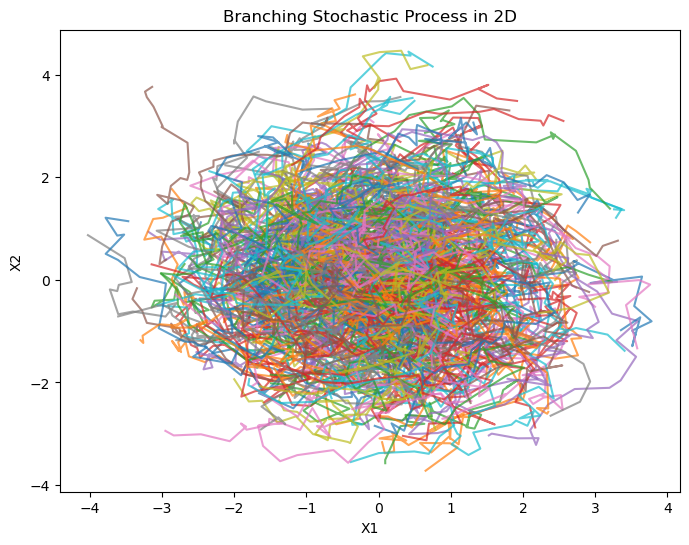

In [33]:
process.plot_trajectories(downsample=5)

In [37]:
print("A appex est", A_est)
print("A", A) 

print("H appex est", H_est)
print("H", H)

A appex est [[ 0.09543394  0.75108402]
 [-0.84802614  0.13117846]]
A [[ 0  1]
 [-1  0]]
H appex est [[ 0.40268301 -0.01927182]
 [-0.01927182  0.40081637]]
H [[1. 0.]
 [0. 1.]]


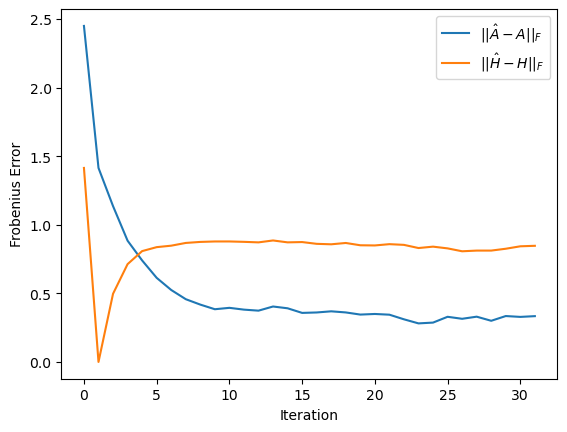

In [36]:
plt.plot(A_error, label="$||\hat{A} - A||_F$")
plt.plot(H_error, label="$||\hat{H} - H||_F$")
plt.xlabel("Iteration")
plt.ylabel("Frobenius Error")
plt.legend()
plt.show()


In [ ]:

N_sample = 10
xs_sampled, idxs_sampled = sample_trajectory_xs_rectangle(Pi_est, xs_data, N_sample=N_sample)

print("A:", A, "\n", "A_est:", As[-1])
print("H:", H, "\n", "H_est", Hs[-1])
print("N_traj", process.N_traj)
# plot_trajectory1d(xs_data, ts_data, 0, show=False)
# [plot_trajectory1d(xs_sampled, ts_data, i, show=False, scatter=False) for i in range(N_sample)];


# 1d trajectories
[plt.plot(ts_data, process.trajectories[i, ::downsample_rate, 0], alpha=0.5) for i in range(process.N_traj)];
[plt.plot(ts_data, xs_sampled[i, :, 0], color="black", alpha=0.5) for i in range(N_sample)];
plt.show()